In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
diabetes=pd.read_csv('/content/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(diabetes.shape)
diabetes.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
#Separating features and label
X=diabetes.drop(columns='Outcome',axis=1)
Y=diabetes['Outcome']

In [10]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [11]:
#Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)
#stratify will make sure 1 \s and 0s are proportional in training and test data


In [28]:
#Standardizing the data
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_test)
X_test_std=scaler.transform(X_test)
print(X_train_std.shape)
print(Y_train.shape)

(154, 8)
(614,)


In [13]:
print(X_train_std)

[[ 0.04238858  0.28372664 -0.08078648 ...  0.14300104 -0.93517106
  -0.46705801]
 [-0.84488148 -0.95332754 -0.2929914  ... -0.35814091 -0.83793639
  -1.04639865]
 [ 1.52117202 -1.54092828  0.44972581 ... -0.04974586 -0.57054105
   0.36057148]
 ...
 [ 0.33814527 -0.21109503  0.34362335 ... -0.10114504 -0.37911029
   0.85714917]
 [-0.84488148 -1.13888567 -0.18688894 ... -0.69223555 -0.35480163
  -0.21876916]
 [-0.84488148 -0.14924233 -0.50519631 ...  0.2329496  -0.00536453
  -0.54982096]]


In [29]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [17]:
#finding accuracy
X_train_predict=classifier.predict(X_train)
Accu_train=accuracy_score(X_train_predict,Y_train)
print(Accu_train)

0.7833876221498371


In [18]:
X_test_predict=classifier.predict(X_test)
Accu_test=accuracy_score(X_test_predict,Y_test)
print(Accu_test)

0.7337662337662337


In [19]:
from sklearn.metrics import f1_score
X_f1_score=f1_score(Y_test, X_test_predict, average='macro')
print(X_f1_score)

0.6842210552638159


In [20]:
from sklearn.metrics import recall_score
X_r_score=recall_score(Y_test, X_test_predict, average='macro')
print(X_r_score)

0.6757407407407408


In [21]:
from sklearn.metrics import precision_score
X_p_score=precision_score(Y_test, X_test_predict, average='macro')
print(X_p_score)

0.7115942028985507


In [22]:
#Making a prediction system
# 0->Non-diabetic 1->Diabetic

l=[1,89,66,23,94,28.1,0.167,21]
arr=np.asarray(l)
dat=arr.reshape(1,-1)#reshape array
prediction=classifier.predict(dat)
if prediction[0]==0:
  print("The person in non-diabetic")
else:
  print("The person is diabteic")


The person in non-diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


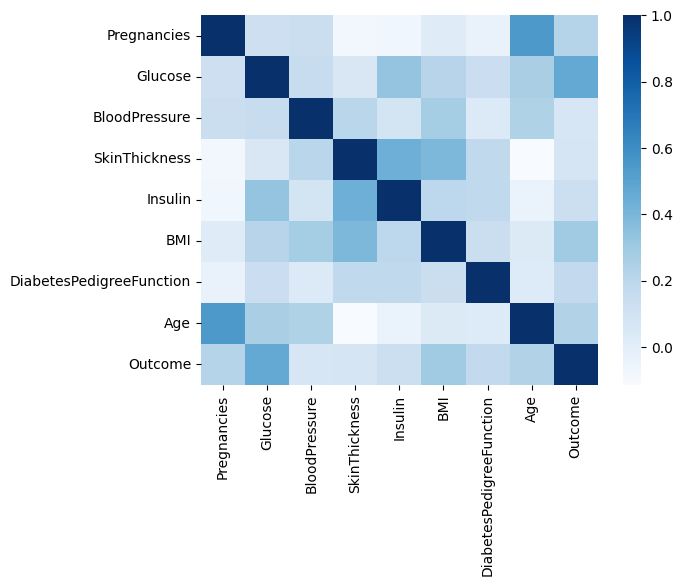

In [23]:
#Visualizing through graphs
cor=diabetes.corr()
fig=sns.heatmap(cor, cbar='True',cmap='Blues')


<Axes: ylabel='Count'>

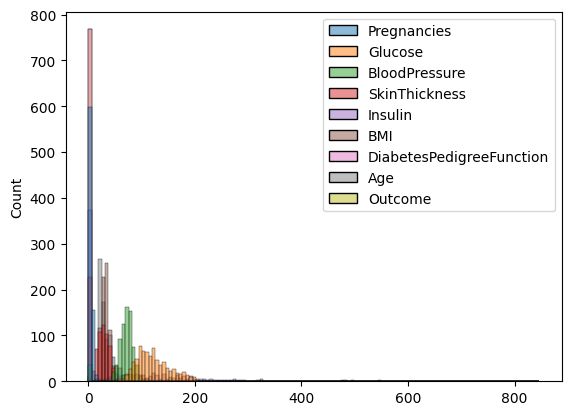

In [24]:
sns.histplot(data=diabetes)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,X_test_predict)
print(confusion_matrix)

[[87 13]
 [28 26]]


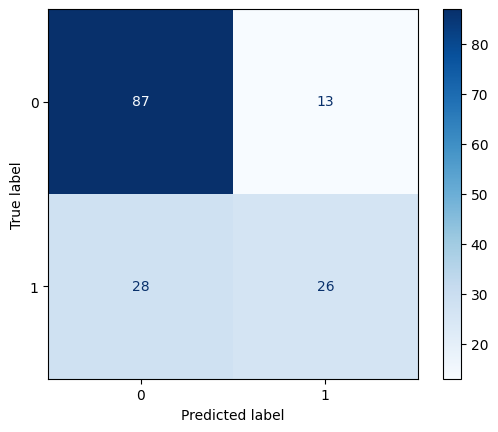

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay  
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test,Y_test,cmap=plt.cm.Blues)